In [2]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("union_datos.csv")

In [4]:
df.columns

Index(['age', 'gender', 'pais', 'estudios', 'puesto_trabajo', 'experiencia',
       'lenguaje_recomendado', 'experiencia_ML', 'industria', 'tamaño_empresa',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=138)

In [5]:
df.head(3)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",$0-999,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL ,

---

### Renombrado columnas

---

In [6]:
#Definimos función para ver nulos y otra renombrar columnas
def nulos(col_ini, col_fin):
    no_nulos = df.loc[:, col_ini : col_fin].notnull().sum()/df.shape[0]*100 
    for col in no_nulos.index:
        print (col, '--->', df[col].value_counts().index[0], '--->', (df.loc[:,col].notnull().sum()/df.shape[0]*100).round(2),'%' )

def renombrar(col_ini, col_fin):
        lista =[]
        no_nulos = df.loc[:, col_ini : col_fin].notnull().sum()/df.shape[0]*100    
        for col in no_nulos.index:
            nombre = df[col].value_counts().index[0]
            lista.append(re.findall('Q\d{2}',col)[0]+'_'+nombre.lower().strip().replace(' ','_'))
        columnas = dict(zip(no_nulos.index, lista))
        return columnas

### Q39 donde compartes publicamente tu trabajo

---

In [7]:
nulos('Q39_Part_1','Q39_OTHER')

Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
Q39_Part_2 --->  Streamlit  ---> 1.49 %
Q39_Part_3 --->  NBViewer  ---> 0.52 %
Q39_Part_4 --->  GitHub  ---> 17.66 %
Q39_Part_5 --->  Personal blog  ---> 2.71 %
Q39_Part_6 --->  Kaggle  ---> 11.8 %
Q39_Part_7 --->  Colab  ---> 7.12 %
Q39_Part_8 --->  Shiny  ---> 1.17 %
Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
Q39_OTHER ---> Other ---> 1.18 %


### Q39 donde compartes publicamente tu trabajo
    Q39_Part_1 --->  Plotly Dash  ---> 1.13 %
    Q39_Part_2 --->  Streamlit  ---> 1.49 %
    Q39_Part_3 --->  NBViewer  ---> 0.52 %
    Q39_Part_4 --->  GitHub  ---> 17.66 %
    Q39_Part_5 --->  Personal blog  ---> 2.71 %
    Q39_Part_6 --->  Kaggle  ---> 11.8 %
    Q39_Part_7 --->  Colab  ---> 7.12 %
    Q39_Part_8 --->  Shiny  ---> 1.17 %
    Q39_Part_9 ---> I do not share my work publicly ---> 12.19 %
    Q39_OTHER ---> Other ---> 1.18 %

Nos quedamos con las columnas más representativas: GitHub, I do not share my work publicly, Kaggle, Colab

In [8]:
df.drop(['Q39_Part_1', 'Q39_Part_2','Q39_Part_3','Q39_Part_5','Q39_Part_8','Q39_OTHER'], axis = 1, inplace = True)

In [9]:
renombrar('Q39_Part_4','Q39_Part_9')

{'Q39_Part_4': 'Q39_github',
 'Q39_Part_6': 'Q39_kaggle',
 'Q39_Part_7': 'Q39_colab',
 'Q39_Part_9': 'Q39_i_do_not_share_my_work_publicly'}

In [10]:
#Cambiamos el nombre a las columnas de Q39
col_q39 = {'Q39_Part_4': 'Q39__github',
 'Q39_Part_6': 'Q39__kaggle',
 'Q39_Part_7': 'Q39__colab',
 'Q39_Part_9': 'Q39_none'}
df.rename(columns = col_q39, inplace = True)

### Q40 en que plataformas has realizado cursos de data science

---

In [11]:
nulos('Q40_Part_1','Q40_OTHER')

Q40_Part_1 ---> Coursera ---> 37.15 %
Q40_Part_2 ---> edX ---> 11.66 %
Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
Q40_Part_4 ---> DataCamp ---> 15.39 %
Q40_Part_5 ---> Fast.ai ---> 4.45 %
Q40_Part_6 ---> Udacity ---> 10.79 %
Q40_Part_7 ---> Udemy ---> 24.79 %
Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
Q40_Part_11 ---> None ---> 6.78 %
Q40_OTHER ---> Other ---> 8.01 %


### Q40 en que plataformas has realizado cursos de data science
    Q40_Part_1 ---> Coursera ---> 37.15 %
    Q40_Part_2 ---> edX ---> 11.66 %
    Q40_Part_3 ---> Kaggle Learn Courses ---> 33.38 %
    Q40_Part_4 ---> DataCamp ---> 15.39 %
    Q40_Part_5 ---> Fast.ai ---> 4.45 %
    Q40_Part_6 ---> Udacity ---> 10.79 %
    Q40_Part_7 ---> Udemy ---> 24.79 %
    Q40_Part_8 ---> LinkedIn Learning ---> 10.37 %
    Q40_Part_9 ---> Cloud-certification programs (direct from AWS, Azure, GCP, or similar) ---> 6.95 %
    Q40_Part_10 ---> University Courses (resulting in a university degree) ---> 18.8 %
    Q40_Part_11 ---> None ---> 6.78 %
    Q40_OTHER ---> Other ---> 8.01 %


In [12]:
renombrar('Q40_Part_1','Q40_OTHER')

{'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification_programs_(direct_from_aws,_azure,_gcp,_or_similar)',
 'Q40_Part_10': 'Q40_university_courses_(resulting_in_a_university_degree)',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}

In [13]:
col_q40 = {'Q40_Part_1': 'Q40_coursera',
 'Q40_Part_2': 'Q40_edx',
 'Q40_Part_3': 'Q40_kaggle_learn_courses',
 'Q40_Part_4': 'Q40_datacamp',
 'Q40_Part_5': 'Q40_fast.ai',
 'Q40_Part_6': 'Q40_udacity',
 'Q40_Part_7': 'Q40_udemy',
 'Q40_Part_8': 'Q40_linkedin_learning',
 'Q40_Part_9': 'Q40_cloud-certification',
 'Q40_Part_10': 'Q40_university_courses',
 'Q40_Part_11': 'Q40_none',
 'Q40_OTHER': 'Q40_other'}
df.rename(columns = col_q40, inplace = True)

### Q27B - En que plataformas de cloud computing esperas familiarizarte en los próximos 2 años

---

In [14]:
nulos('Q27_B_Part_1','Q27_B_OTHER')

Q27_B_Part_1 --->  Amazon Web Services (AWS)  ---> 28.85 %
Q27_B_Part_2 --->  Microsoft Azure  ---> 21.75 %
Q27_B_Part_3 --->  Google Cloud Platform (GCP)  ---> 28.81 %
Q27_B_Part_4 --->  IBM Cloud / Red Hat  ---> 9.97 %
Q27_B_Part_5 --->  Oracle Cloud  ---> 6.59 %
Q27_B_Part_6 --->  SAP Cloud  ---> 3.5 %
Q27_B_Part_7 --->  VMware Cloud  ---> 3.02 %
Q27_B_Part_8 --->  Salesforce Cloud  ---> 3.05 %
Q27_B_Part_9 --->  Alibaba Cloud  ---> 2.43 %
Q27_B_Part_10 --->  Tencent Cloud  ---> 2.12 %
Q27_B_Part_11 ---> None ---> 8.62 %
Q27_B_OTHER ---> Other ---> 1.04 %


### Q27B - En que plataformas de cloud computing esperas familiarizarte en los próximos 2 años
    Q27_B_Part_1 --->  Amazon Web Services (AWS)  ---> 28.85 %
    Q27_B_Part_2 --->  Microsoft Azure  ---> 21.75 %
    Q27_B_Part_3 --->  Google Cloud Platform (GCP)  ---> 28.81 %
    Q27_B_Part_4 --->  IBM Cloud / Red Hat  ---> 9.97 %
    Q27_B_Part_5 --->  Oracle Cloud  ---> 6.59 %
    Q27_B_Part_6 --->  SAP Cloud  ---> 3.5 %
    Q27_B_Part_7 --->  VMware Cloud  ---> 3.02 %
    Q27_B_Part_8 --->  Salesforce Cloud  ---> 3.05 %
    Q27_B_Part_9 --->  Alibaba Cloud  ---> 2.43 %
    Q27_B_Part_10 --->  Tencent Cloud  ---> 2.12 %
    Q27_B_Part_11 ---> None ---> 8.62 %
    Q27_B_OTHER ---> Other ---> 1.04 %


In [15]:
col_q27b = renombrar('Q27_B_Part_1','Q27_B_OTHER')
df.rename(columns = col_q27b, inplace = True)

### Q29B - En que productos específicos de cloud computing esperas familiarizarte en los próximos 2 años

---

In [16]:
nulos('Q29_B_Part_1','Q29_B_OTHER')

Q29_B_Part_1 --->  Amazon Elastic Compute Cloud (EC2)  ---> 20.71 %
Q29_B_Part_2 --->  Microsoft Azure Virtual Machines  ---> 22.3 %
Q29_B_Part_3 --->  Google Cloud Compute Engine  ---> 28.86 %
Q29_B_Part_4 ---> None ---> 3.73 %
Q29_B_OTHER ---> Other ---> 0.3 %


### Q29B - En que productos específicos de cloud computing esperas familiarizarte en los próximos 2 años
    Q29_B_Part_1 --->  Amazon Elastic Compute Cloud (EC2)  ---> 20.71 %
    Q29_B_Part_2 --->  Microsoft Azure Virtual Machines  ---> 22.3 %
    Q29_B_Part_3 --->  Google Cloud Compute Engine  ---> 28.86 %
    Q29_B_Part_4 ---> None ---> 3.73 %
    Q29_B_OTHER ---> Other ---> 0.3 %

In [17]:
df.drop(['Q29_B_OTHER'], axis = 1, inplace = True)

In [18]:
col_q29b = renombrar('Q29_B_Part_1','Q29_B_Part_4')
df.rename(columns = col_q29b, inplace = True)

### Q31B - En que productos machine learning esperas familiarizarte en los próximos 2 años

---

In [19]:
nulos('Q31_B_Part_1','Q31_B_OTHER')

Q31_B_Part_1 --->  Amazon SageMaker  ---> 14.05 %
Q31_B_Part_2 --->  Azure Machine Learning Studio  ---> 19.36 %
Q31_B_Part_3 --->  Google Cloud Vertex AI ---> 20.42 %
Q31_B_Part_4 --->  DataRobot ---> 7.05 %
Q31_B_Part_5 --->  Databricks ---> 8.48 %
Q31_B_Part_6 --->  Dataiku ---> 2.94 %
Q31_B_Part_7 --->  Alteryx ---> 3.05 %
Q31_B_Part_8 --->  Rapidminer ---> 3.92 %
Q31_B_Part_9 ---> None ---> 15.83 %
Q31_B_OTHER ---> Other ---> 1.34 %


### Q31B - En que productos machine learning esperas familiarizarte en los próximos 2 años
    Q31_B_Part_1 --->  Amazon SageMaker  ---> 14.05 %
    Q31_B_Part_2 --->  Azure Machine Learning Studio  ---> 19.36 %
    Q31_B_Part_3 --->  Google Cloud Vertex AI ---> 20.42 %
    Q31_B_Part_4 --->  DataRobot ---> 7.05 %
    Q31_B_Part_5 --->  Databricks ---> 8.48 %
    Q31_B_Part_6 --->  Dataiku ---> 2.94 %
    Q31_B_Part_7 --->  Alteryx ---> 3.05 %
    Q31_B_Part_8 --->  Rapidminer ---> 3.92 %
    Q31_B_Part_9 ---> None ---> 15.83 %
    Q31_B_OTHER ---> Other ---> 1.34 %

In [20]:
col_q31b = renombrar('Q31_B_Part_1','Q31_B_OTHER')
df.rename(columns = col_q31b, inplace = True)

### Q32B - En que productos de big data esperas familiarizarte en los próximos 2 años

---

In [21]:
nulos('Q32_B_Part_1','Q32_B_OTHER')

Q32_B_Part_1 ---> MySQL  ---> 23.62 %
Q32_B_Part_2 ---> PostgreSQL  ---> 12.66 %
Q32_B_Part_3 ---> SQLite  ---> 11.69 %
Q32_B_Part_4 ---> Oracle Database  ---> 8.87 %
Q32_B_Part_5 ---> MongoDB  ---> 16.51 %
Q32_B_Part_6 ---> Snowflake  ---> 4.18 %
Q32_B_Part_7 ---> IBM Db2  ---> 4.6 %
Q32_B_Part_8 ---> Microsoft SQL Server  ---> 12.1 %
Q32_B_Part_9 ---> Microsoft Azure SQL Database  ---> 10.32 %
Q32_B_Part_10 ---> Microsoft Azure Cosmos DB  ---> 5.97 %
Q32_B_Part_11 ---> Amazon Redshift  ---> 4.66 %
Q32_B_Part_12 ---> Amazon Aurora  ---> 4.55 %
Q32_B_Part_13 ---> Amazon DynamoDB  ---> 5.75 %
Q32_B_Part_14 ---> Amazon RDS  ---> 8.64 %
Q32_B_Part_15 ---> Google Cloud BigQuery  ---> 10.95 %
Q32_B_Part_16 ---> Google Cloud SQL  ---> 12.64 %
Q32_B_Part_17 ---> Google Cloud Firestore  ---> 6.26 %
Q32_B_Part_18 ---> Google Cloud BigTable  ---> 7.89 %
Q32_B_Part_19 ---> Google Cloud Spanner  ---> 4.82 %
Q32_B_Part_20 ---> None ---> 7.21 %
Q32_B_OTHER ---> Other ---> 0.98 %


### Q32B - En que productos de big data esperas familiarizarte en los próximos 2 años
    Q32_B_Part_1 ---> MySQL  ---> 23.62 %
    Q32_B_Part_2 ---> PostgreSQL  ---> 12.66 %
    Q32_B_Part_3 ---> SQLite  ---> 11.69 %
    Q32_B_Part_4 ---> Oracle Database  ---> 8.87 %
    Q32_B_Part_5 ---> MongoDB  ---> 16.51 %
    Q32_B_Part_6 ---> Snowflake  ---> 4.18 %
    Q32_B_Part_7 ---> IBM Db2  ---> 4.6 %
    Q32_B_Part_8 ---> Microsoft SQL Server  ---> 12.1 %
    Q32_B_Part_9 ---> Microsoft Azure SQL Database  ---> 10.32 %
    Q32_B_Part_10 ---> Microsoft Azure Cosmos DB  ---> 5.97 %
    Q32_B_Part_11 ---> Amazon Redshift  ---> 4.66 %
    Q32_B_Part_12 ---> Amazon Aurora  ---> 4.55 %
    Q32_B_Part_13 ---> Amazon DynamoDB  ---> 5.75 %
    Q32_B_Part_14 ---> Amazon RDS  ---> 8.64 %
    Q32_B_Part_15 ---> Google Cloud BigQuery  ---> 10.95 %
    Q32_B_Part_16 ---> Google Cloud SQL  ---> 12.64 %
    Q32_B_Part_17 ---> Google Cloud Firestore  ---> 6.26 %
    Q32_B_Part_18 ---> Google Cloud BigTable  ---> 7.89 %
    Q32_B_Part_19 ---> Google Cloud Spanner  ---> 4.82 %
    Q32_B_Part_20 ---> None ---> 7.21 %
    Q32_B_OTHER ---> Other ---> 0.98 %


In [22]:
df.drop(['Q32_B_OTHER'], axis = 1, inplace = True)

In [23]:
col_q32b = renombrar('Q32_B_Part_1','Q32_B_Part_20')
df.rename(columns = col_q32b, inplace = True)

### Q34B - En que herramientas de business intelligence esperas familiarizarte en los próximos 2 años

---

In [24]:
nulos('Q34_B_Part_1','Q34_B_OTHER')

Q34_B_Part_1 ---> Microsoft Power BI ---> 18.95 %
Q34_B_Part_2 ---> Amazon QuickSight ---> 4.88 %
Q34_B_Part_3 ---> Google Data Studio ---> 15.75 %
Q34_B_Part_4 ---> Looker ---> 2.15 %
Q34_B_Part_5 ---> Tableau ---> 20.87 %
Q34_B_Part_6 ---> Salesforce ---> 4.87 %
Q34_B_Part_7 ---> Tableau CRM ---> 6.54 %
Q34_B_Part_8 ---> Qlik ---> 3.01 %
Q34_B_Part_9 ---> Domo ---> 1.06 %
Q34_B_Part_10 ---> TIBCO Spotfire ---> 1.03 %
Q34_B_Part_11 ---> Alteryx  ---> 2.03 %
Q34_B_Part_12 ---> Sisense  ---> 1.21 %
Q34_B_Part_13 ---> SAP Analytics Cloud  ---> 5.17 %
Q34_B_Part_14 ---> Microsoft Azure Synapse  ---> 6.53 %
Q34_B_Part_15 ---> Thoughtspot  ---> 1.01 %
Q34_B_Part_16 ---> None ---> 11.77 %
Q34_B_OTHER ---> Other ---> 1.12 %


### Q34B - En que herramientas de business intelligence esperas familiarizarte en los próximos 2 años
    Q34_B_Part_1 ---> Microsoft Power BI ---> 18.95 %
    Q34_B_Part_2 ---> Amazon QuickSight ---> 4.88 %
    Q34_B_Part_3 ---> Google Data Studio ---> 15.75 %
    Q34_B_Part_4 ---> Looker ---> 2.15 %
    Q34_B_Part_5 ---> Tableau ---> 20.87 %
    Q34_B_Part_6 ---> Salesforce ---> 4.87 %
    Q34_B_Part_7 ---> Tableau CRM ---> 6.54 %
    Q34_B_Part_8 ---> Qlik ---> 3.01 %
    Q34_B_Part_9 ---> Domo ---> 1.06 %
    Q34_B_Part_10 ---> TIBCO Spotfire ---> 1.03 %
    Q34_B_Part_11 ---> Alteryx  ---> 2.03 %
    Q34_B_Part_12 ---> Sisense  ---> 1.21 %
    Q34_B_Part_13 ---> SAP Analytics Cloud  ---> 5.17 %
    Q34_B_Part_14 ---> Microsoft Azure Synapse  ---> 6.53 %
    Q34_B_Part_15 ---> Thoughtspot  ---> 1.01 %
    Q34_B_Part_16 ---> None ---> 11.77 %
    Q34_B_OTHER ---> Other ---> 1.12 %

In [25]:
col_q34b = renombrar('Q34_B_Part_1','Q34_B_OTHER')
df.rename(columns = col_q34b, inplace = True)

### Q36B - En que categorías de herramientas de machine learning esperas familiarizarte en los próximos 2 años

---

In [26]:
nulos('Q36_B_Part_1','Q36_B_OTHER')

Q36_B_Part_1 ---> Automated data augmentation (e.g. imgaug, albumentations) ---> 13.46 %
Q36_B_Part_2 ---> Automated feature engineering/selection (e.g. tpot, boruta_py) ---> 14.05 %
Q36_B_Part_3 ---> Automated model selection (e.g. auto-sklearn, xcessiv) ---> 18.33 %
Q36_B_Part_4 ---> Automated model architecture searches (e.g. darts, enas) ---> 8.4 %
Q36_B_Part_5 ---> Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier) ---> 12.82 %
Q36_B_Part_6 ---> Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI) ---> 18.3 %
Q36_B_Part_7 ---> None ---> 12.4 %
Q36_B_OTHER ---> Other ---> 1.24 %


### Q36B - En que categorías de herramientas de machine learning esperas familiarizarte en los próximos 2 años
    Q36_B_Part_1 ---> Automated data augmentation (e.g. imgaug, albumentations) ---> 13.46 %
    Q36_B_Part_2 ---> Automated feature engineering/selection (e.g. tpot, boruta_py) ---> 14.05 %
    Q36_B_Part_3 ---> Automated model selection (e.g. auto-sklearn, xcessiv) ---> 18.33 %
    Q36_B_Part_4 ---> Automated model architecture searches (e.g. darts, enas) ---> 8.4 %
    Q36_B_Part_5 ---> Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier) ---> 12.82 %
    Q36_B_Part_6 ---> Automation of full ML pipelines (e.g. Google Cloud AutoML, H2O Driverless AI) ---> 18.3 %
    Q36_B_Part_7 ---> None ---> 12.4 %
    Q36_B_OTHER ---> Other ---> 1.24 %

In [27]:
renombrar('Q36_B_Part_1','Q36_B_OTHER')

{'Q36_B_Part_1': 'Q36_automated_data_augmentation_(e.g._imgaug,_albumentations)',
 'Q36_B_Part_2': 'Q36_automated_feature_engineering/selection_(e.g._tpot,_boruta_py)',
 'Q36_B_Part_3': 'Q36_automated_model_selection_(e.g._auto-sklearn,_xcessiv)',
 'Q36_B_Part_4': 'Q36_automated_model_architecture_searches_(e.g._darts,_enas)',
 'Q36_B_Part_5': 'Q36_automated_hyperparameter_tuning_(e.g._hyperopt,_ray.tune,_vizier)',
 'Q36_B_Part_6': 'Q36_automation_of_full_ml_pipelines_(e.g._google_cloud_automl,_h2o_driverless_ai)',
 'Q36_B_Part_7': 'Q36_none',
 'Q36_B_OTHER': 'Q36_other'}

In [28]:
col_q36b = {'Q36_B_Part_1': 'Q36_data_augmentation',
 'Q36_B_Part_2': 'Q36_feature_engineering/selection',
 'Q36_B_Part_3': 'Q36_model_selection',
 'Q36_B_Part_4': 'Q36_model_architecture_searches',
 'Q36_B_Part_5': 'Q36_hyperparameter_tuning',
 'Q36_B_Part_6': 'Q36_full_ml_pipelines',
 'Q36_B_Part_7': 'Q36_none',
 'Q36_B_OTHER': 'Q36_other'}
df.rename(columns = col_q36b, inplace = True)

### Q37B - En que herramientas específicas de machine learning esperas familiarizarte en los próximos 2 años

---

In [29]:
nulos('Q37_B_Part_1','Q37_B_OTHER')

Q37_B_Part_1 --->  Google Cloud AutoML  ---> 18.55 %
Q37_B_Part_2 --->  H2O Driverless AI   ---> 5.34 %
Q37_B_Part_3 --->  Databricks AutoML  ---> 6.35 %
Q37_B_Part_4 --->  DataRobot AutoML  ---> 5.95 %
Q37_B_Part_5 --->   Amazon Sagemaker Autopilot  ---> 10.33 %
Q37_B_Part_6 --->   Azure Automated Machine Learning  ---> 12.14 %
Q37_B_Part_7 ---> None ---> 5.38 %
Q37_B_OTHER ---> Other ---> 1.08 %


### Q37B - En que herramientas específicas de machine learning esperas familiarizarte en los próximos 2 años
    Q37_B_Part_1 --->  Google Cloud AutoML  ---> 18.55 %
    Q37_B_Part_2 --->  H2O Driverless AI   ---> 5.34 %
    Q37_B_Part_3 --->  Databricks AutoML  ---> 6.35 %
    Q37_B_Part_4 --->  DataRobot AutoML  ---> 5.95 %
    Q37_B_Part_5 --->   Amazon Sagemaker Autopilot  ---> 10.33 %
    Q37_B_Part_6 --->   Azure Automated Machine Learning  ---> 12.14 %
    Q37_B_Part_7 ---> None ---> 5.38 %
    Q37_B_OTHER ---> Other ---> 1.08 %

In [30]:
col_q37b = renombrar('Q37_B_Part_1','Q37_B_OTHER')
df.rename(columns = col_q37b, inplace = True)

### Q38B - En que herramientas de gestion de machine learning esperas familiarizarte en los próximos 2 años

---

In [31]:
nulos('Q38_B_Part_1','Q38_B_OTHER')

Q38_B_Part_1 --->  Neptune.ai  ---> 4.91 %
Q38_B_Part_2 --->  Weights & Biases  ---> 6.09 %
Q38_B_Part_3 --->  Comet.ml  ---> 2.44 %
Q38_B_Part_4 --->  Sacred + Omniboard  ---> 2.28 %
Q38_B_Part_5 --->  TensorBoard  ---> 16.32 %
Q38_B_Part_6 --->  Guild.ai  ---> 2.81 %
Q38_B_Part_7 --->  Polyaxon  ---> 2.84 %
Q38_B_Part_8 --->  ClearML  ---> 3.93 %
Q38_B_Part_9 --->  Domino Model Monitor  ---> 2.56 %
Q38_B_Part_10 --->  MLflow  ---> 10.58 %
Q38_B_Part_11 ---> None ---> 17.49 %
Q38_B_OTHER ---> Other ---> 1.45 %


### Q38B - En que herramientas de gestion de machine learning esperas familiarizarte en los próximos 2 años
    Q38_B_Part_1 --->  Neptune.ai  ---> 4.91 %
    Q38_B_Part_2 --->  Weights & Biases  ---> 6.09 %
    Q38_B_Part_3 --->  Comet.ml  ---> 2.44 %
    Q38_B_Part_4 --->  Sacred + Omniboard  ---> 2.28 %
    Q38_B_Part_5 --->  TensorBoard  ---> 16.32 %
    Q38_B_Part_6 --->  Guild.ai  ---> 2.81 %
    Q38_B_Part_7 --->  Polyaxon  ---> 2.84 %
    Q38_B_Part_8 --->  ClearML  ---> 3.93 %
    Q38_B_Part_9 --->  Domino Model Monitor  ---> 2.56 %
    Q38_B_Part_10 --->  MLflow  ---> 10.58 %
    Q38_B_Part_11 ---> None ---> 17.49 %
    Q38_B_OTHER ---> Other ---> 1.45 %

In [32]:
col_q38b = renombrar('Q38_B_Part_1','Q38_B_OTHER')
df.rename(columns = col_q38b, inplace = True)

In [33]:
df.head()

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,

---

In [34]:
df['Q28'].value_counts()/df.shape[0]*100

 Amazon Web Services (AWS)                                 3.218727
 Google Cloud Platform (GCP)                               2.841412
They all had a similarly enjoyable developer experience    2.718207
 Microsoft Azure                                           1.747969
None were satisfactory                                     0.365764
 IBM Cloud / Red Hat                                       0.319563
 Oracle Cloud                                              0.231009
 Alibaba Cloud                                             0.130905
Other                                                      0.119355
 VMware Cloud                                              0.115505
 SAP Cloud                                                 0.088553
 Salesforce Cloud                                          0.088553
 Tencent Cloud                                             0.053902
Name: Q28, dtype: float64

In [35]:
df['IDE'].value_counts() #Sacamos los valores únicos de la columna IDE

Jupyter Notebook                                                                                                                   2341
Visual Studio Code (VSCode) ,Jupyter Notebook                                                                                      1412
Visual Studio Code (VSCode)                                                                                                         939
PyCharm ,Jupyter Notebook                                                                                                           820
Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook                                                                              554
                                                                                                                                   ... 
RStudio ,Visual Studio , Spyder, Vim / Emacs,Jupyter Notebook                                                                         1
Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Vi

## COLUMNA IDE

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [38]:
df_IDE = df['IDE'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_IDE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Vim / Emacs,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Notepad++,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
2,PyCharm,Jupyter Notebook,Other,None,None,None,None,None,None,None,None,None,None,None
3,Spyder,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
4,Spyder,MATLAB,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None


In [39]:
# Contamos los valores únicos del df_IDE -- pendiente eliminar Jupyter repetido
df_IDE.stack().value_counts()

Jupyter Notebook                16233
Visual Studio Code (VSCode)     10040
PyCharm                          7468
Jupyter (JupyterLab              5488
 Jupyter Notebooks               5488
 etc)                            5488
RStudio                          4771
Visual Studio                    4110
 Notepad++                       3937
 Spyder                          3794
 Sublime Text                    2839
MATLAB                           2203
 Vim / Emacs                     1646
 Other                           1491
 None                             526
dtype: int64

In [42]:
# Creamos un DF con la suma de los valores únicos
nombres_ide = df_IDE.stack().value_counts().reset_index() # renombramos las columnas de IDE
nombres_ide.rename(columns= {"index": "IDE_name",0: "cantidad"}, inplace= True)
nombres_ide


,IDE_name,cantidad
0,Jupyter Notebook,16233
1,Visual Studio Code (VSCode),10040
2,PyCharm,7468
3,Jupyter (JupyterLab,5488
4,Jupyter Notebooks,5488
5,etc),5488
6,RStudio,4771
7,Visual Studio,4110
8,Notepad++,3937
9,Spyder,3794


In [43]:
# Eliminamos los valores incorrectos y modificamos el nombre incorrecto
nombres_ide.drop([4,5], axis= 0, inplace= True) 
nombres_ide.replace("Jupyter (JupyterLab", "JupyterLab", inplace= True) 


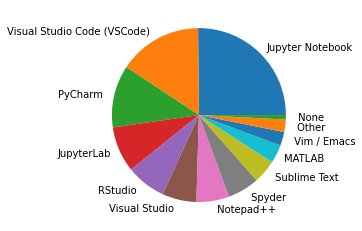

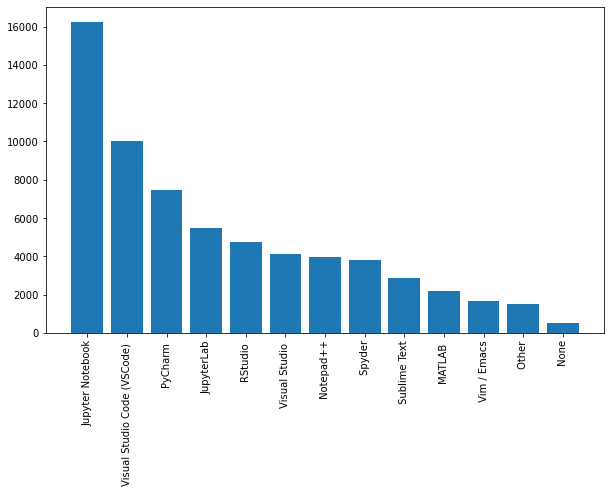

In [44]:

plt.figure()
plt.pie(nombres_ide["cantidad"], labels=nombres_ide["IDE_name"])
plt.show()
plt.figure(figsize= (10,6))
plt.bar(nombres_ide["IDE_name"],nombres_ide["cantidad"])
plt.xticks(rotation = 90)
plt.show()


## COLUMNA LENGUAJE_UTILIZADO

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [36]:
df_lenguaje = df['lenguaje_utilizado'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_lenguaje

,0,1,2,3,4,5,6,7,8,9,10,11
0,Python,R,None,None,None,None,None,None,None,None,None,None
1,SQL,C,C++,Java,None,None,None,None,None,None,None,None
2,Python,C++,Java,None,None,None,None,None,None,None,None,None
3,Python,None,None,None,None,None,None,None,None,None,None,None
4,Python,C,MATLAB,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
25968,Python,SQL,Javascript,Bash,None,None,None,None,None,None,None,None
25969,Python,None,None,None,None,None,None,None,None,None,None,None
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Python,SQL,None,None,None,None,None,None,None,None,None,None


In [37]:
#Sacamos los valores únicos de df_lenguaje
df_lenguaje.stack().value_counts()

Python         21860
 SQL           10756
 C++            5535
 R              5334
 Java           4769
 C              4709
 Javascript     4332
 MATLAB         2935
 Other          2575
 Bash           2216
 None            319
 Julia           305
 Swift           242
dtype: int64

In [40]:
# Creamos un DF con la suma de los valores únicos
lenguajes = df_lenguaje.stack().value_counts().reset_index() # contamos valores únicos de lenguaje
lenguajes.rename(columns= {"index": "lenguajes_programacion", 0: "suma"}, inplace= True)
lenguajes

,lenguajes_programacion,suma
0,Python,21860
1,SQL,10756
2,C++,5535
3,R,5334
4,Java,4769
5,C,4709
6,Javascript,4332
7,MATLAB,2935
8,Other,2575
9,Bash,2216


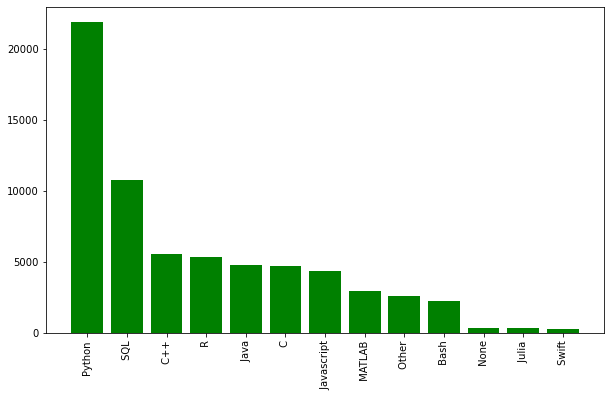

In [41]:
# countplot de lenguajes
plt.figure(figsize= (10,6))
plt.bar(lenguajes["lenguajes_programacion"],lenguajes["suma"], color = "green")
plt.xticks(rotation = 90)
plt.show()


In [47]:
df.head(2)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16,Q17,Q32,Q34,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999","Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,Oracle Cloud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,

## HERRAMIENTAS DE VISUALIZACIÓN

Creamos un Dataframe solo con las columnas index, age, gender, puesto_trabajo y herramientas_visualizacion

In [49]:
df_visualizacion = df[["age", "gender", "puesto_trabajo", "herramientas_visualizacion"]]

In [50]:
df_visualizacion.head(2)

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ..."
1,50-54,Man,Program/Project Manager,Matplotlib


Convertimos la columna "herramientas_visualizacion" en lista

In [51]:
df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",")

/tmp/ipykernel_434/2066483188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",")


In [52]:
# Comprobamos que son listas
df_visualizacion.head()

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,"[ Matplotlib , Seaborn , Ggplot / ggplot2 , Sh..."
1,50-54,Man,Program/Project Manager,[ Matplotlib ]
2,22-24,Man,Software Engineer,[ Matplotlib ]
3,45-49,Man,Research Scientist,[ Matplotlib ]
4,45-49,Man,Other,"[ Matplotlib , Seaborn , Ggplot / ggplot2 ]"


Con explode, separamos las listas en filas

In [53]:
df_visualizacion = df_visualizacion.explode("herramientas_visualizacion")

In [54]:
# Comprobamos
df_visualizacion.head()

,age,gender,puesto_trabajo,herramientas_visualizacion
0,50-54,Man,Other,Matplotlib
0,50-54,Man,Other,Seaborn
0,50-54,Man,Other,Ggplot / ggplot2
0,50-54,Man,Other,Shiny
0,50-54,Man,Other,Leaflet / Folium


GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES Y ESTUDIANTES

In [55]:
# Creamos una lista con los diferentes valores para ordenar los subplots
lista_visualizacion = list(df_visualizacion["herramientas_visualizacion"].unique())

/tmp/ipykernel_434/2167194397.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


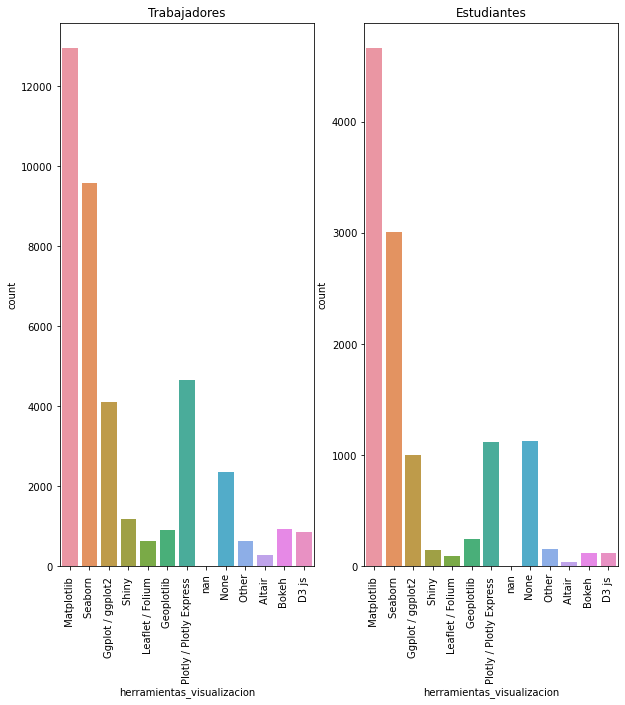

In [56]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], ax=ax[0], order=lista_visualizacion)
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_visualizacion)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()

GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES POR GÉNERO

Text(0.5, 1.0, 'Herramientas de visualización por género')

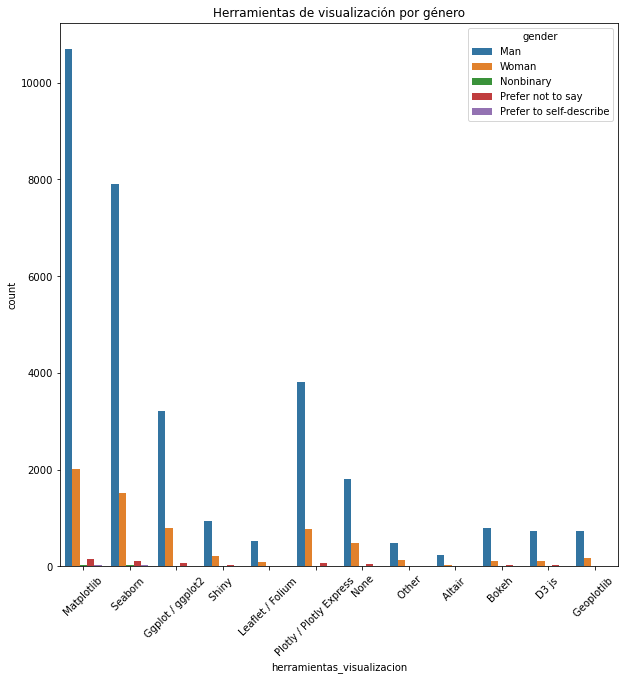

In [62]:
plt.figure(figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], hue="gender")
plt.xticks(rotation = 45)
plt.title("Herramientas de visualización por género")


## PREGUNTA LENGUAJE RECOMENDADO

In [57]:
# Comprobamos los valores únicos
df["lenguaje_recomendado"].value_counts()

Python        20213
R              1445
SQL            1338
C               440
C++             437
Java            242
MATLAB          215
Other           176
Julia           137
Javascript      133
None            111
Bash             38
Swift            15
Name: lenguaje_recomendado, dtype: int64

In [58]:
# Creamos una lista para ordenar los subplots
lista_leng = list(df["lenguaje_recomendado"].unique())

/tmp/ipykernel_434/2591339971.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


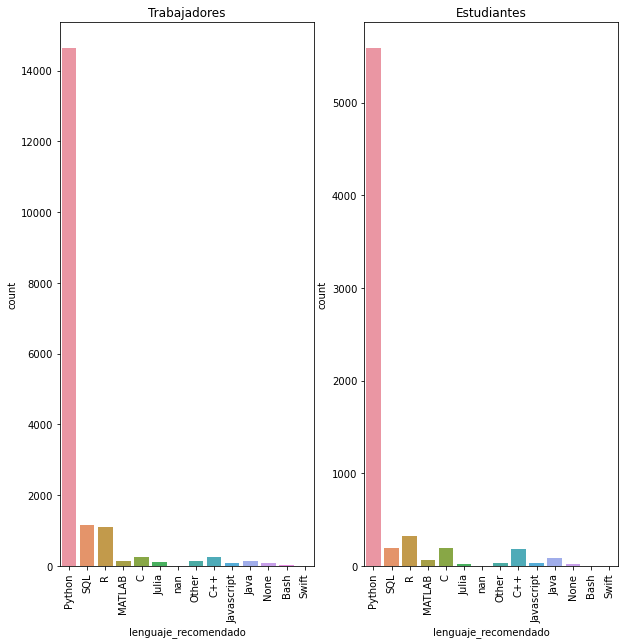

In [59]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]!= "Student"], ax=ax[0], order= lista_leng)
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_leng)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()